In [18]:
#Import header
import pandas as pd
pd.options.mode.chained_assignment = None
#file
file_path = 'C:/Users/Tobia/Desktop/DM Projekt/train.csv'
#read csv
df = pd.read_csv(file_path)

In [3]:
#first rows
print(df.head())

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [4]:
#datatype
print(df.dtypes)

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object


In [5]:
# distribution object type
print(df.select_dtypes(include=['object']).describe())

                      Dates       Category                      Descript  \
count                878049         878049                        878049   
unique               389257             39                           879   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                    185         174900                         60022   

       DayOfWeek PdDistrict Resolution                 Address  
count     878049     878049     878049                  878049  
unique         7         10         17                   23228  
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST  
freq      133734     157182     526790                   26533  


In [6]:
#check for missingno original data
print('Missing values original data:')
print(df.isnull().sum())

Missing values original data:
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


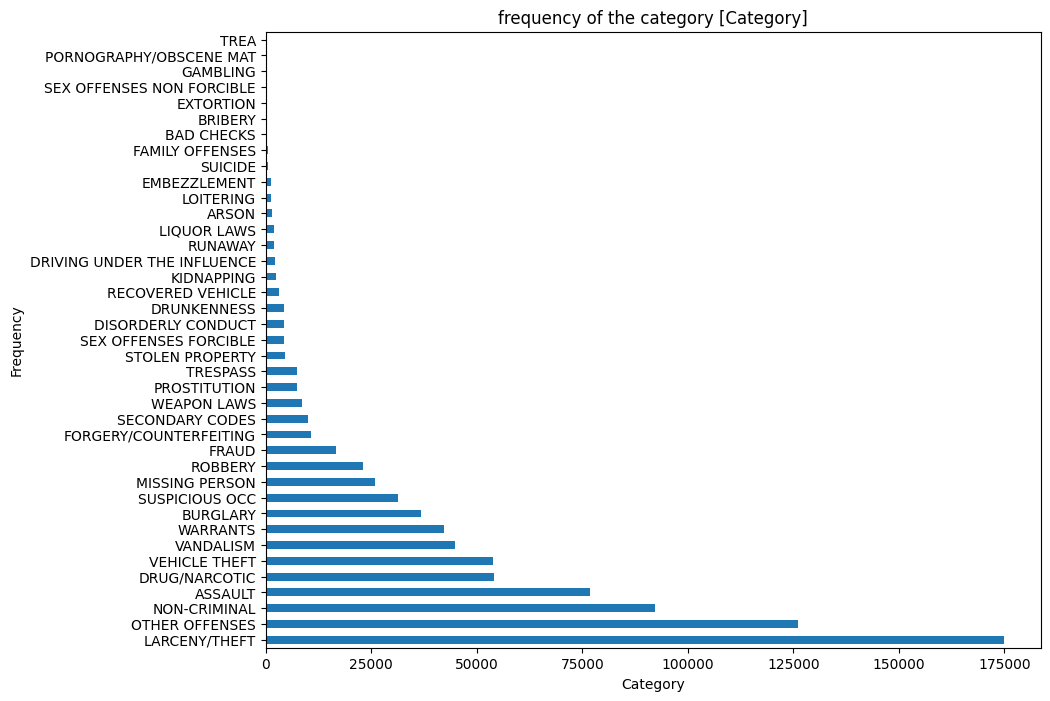

In [7]:
#show the distribution of crimes in the original file to get an overview
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category [Category]')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [8]:
# filter for needed crimes
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]

# print new filter_df
print(filter_df.head())

                 Dates       Category                        Descript  \
3  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00  LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   

   DayOfWeek PdDistrict Resolution                    Address           X  \
3  Wednesday   NORTHERN       NONE   1500 Block of LOMBARD ST -122.426995   
4  Wednesday       PARK       NONE  100 Block of BRODERICK ST -122.438738   
5  Wednesday  INGLESIDE       NONE        0 Block of TEDDY AV -122.403252   
6  Wednesday  INGLESIDE       NONE        AVALON AV / PERU AV -122.423327   
7  Wednesday    BAYVIEW       NONE   KIRKWOOD AV / DONAHUE ST -122.371274   

           Y  
3  37.800873  
4  37.771541  
5  37.713431  
6  37.725138  
7  37.727564  


In [9]:
print('New df data types:')
filter_df.dtypes

New df data types:


Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [10]:
#check distribution
print('Distribution after filtering:')
filter_df.select_dtypes(include=['object']).describe()


Distribution after filtering:


Dates       Category                      Descript  \
count                396283         396283                        396283   
unique               216686              5                           267   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                     35         174900                         60022   

       DayOfWeek PdDistrict Resolution                 Address  
count     396283     396283     396283                  396283  
unique         7         10         17                   21077  
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST  
freq       60624      72822     286048                    9369

In [11]:
#check for missingno (not needed because we checked the whole data first)
print('Missing values:')
filter_df.isnull().sum()

Missing values:


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
#lets look into the new filtered df
filter_df

Dates       Category                        Descript  \
3       2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4       2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5       2015-05-13 23:30:00  LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6       2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   
7       2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   
...                     ...            ...                             ...   
878036  2003-01-06 00:55:00  LARCENY/THEFT         PETTY THEFT SHOPLIFTING   
878040  2003-01-06 00:33:00        ASSAULT     INFLICT INJURY ON COHABITEE   
878042  2003-01-06 00:20:00        ASSAULT   ATTEMPTED HOMICIDE WITH A GUN   
878045  2003-01-06 00:01:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
878046  2003-01-06 00:01:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

        DayOfWeek PdDistrict      Resolution                    Address  \
3       Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4       Wednesday       PARK            NONE  100 Block of BRODERICK ST   
5       Wednesday  INGLESIDE            NONE        0 Block of TEDDY AV   
6       Wednesday  INGLESIDE            NONE        AVALON AV / PERU AV   
7       Wednesday    BAYVIEW            NONE   KIRKWOOD AV / DONAHUE ST   
...           ...        ...             ...                        ...   
878036     Monday   NORTHERN            NONE   1300 Block of WEBSTER ST   
878040     Monday    MISSION            NONE    2800 Block of FOLSOM ST   
878042     Monday    BAYVIEW  ARREST, BOOKED   1500 Block of SHAFTER AV   
878045     Monday  INGLESIDE            NONE       600 Block of EDNA ST   
878046     Monday   SOUTHERN            NONE         5TH ST / FOLSOM ST   

                 X          Y  
3      -122.426995  37.800873  
4      -122.438738  37.771541  
5      -122.403252  37.713431  
6      -122.423327  37.725138  
7      -122.371274  37.727564  
...            ...        ...  
878036 -122.431046  37.783030  
878040 -122.414073  37.751685  
878042 -122.389769  37.730564  
878045 -122.447364  37.731948  
878046 -122.403390  37.780266  

[396283 rows x 9 columns]

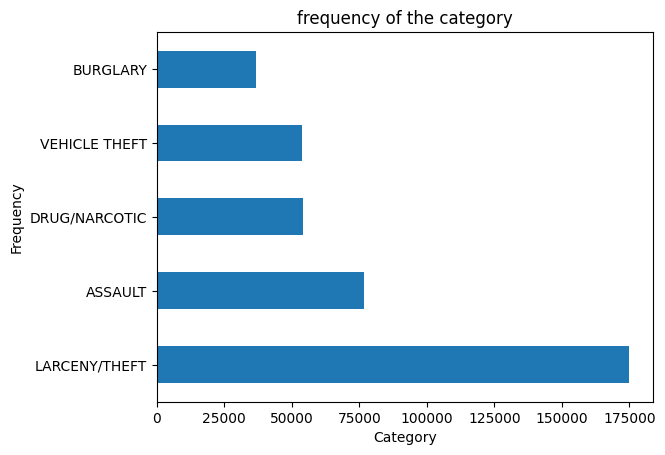

In [13]:
# plot new df to see wich category is most present
filter_df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [36]:
# to get an overview of how the criminal cases have developed over time
# to do this we need to look into the column "dates"
# we notice that the column itself is described as an object, so we have to convert it into datetime
filter_df['Dates'] = pd.to_datetime(filter_df['Dates'])
# furthermore, we can extract any of the different parts within the date and use them for new columns
filter_df['year'] = filter_df['Dates'].dt.year
filter_df['quarter'] = filter_df['Dates'].dt.quarter
filter_df['month'] = filter_df['Dates'].dt.month
filter_df['day'] = filter_df['Dates'].dt.day
filter_df['hour'] = filter_df['Dates'].dt.hour
filter_df
filter_df.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
year                   int32
month                  int32
day                    int32
hour                   int32
quarter                int32
dtype: object

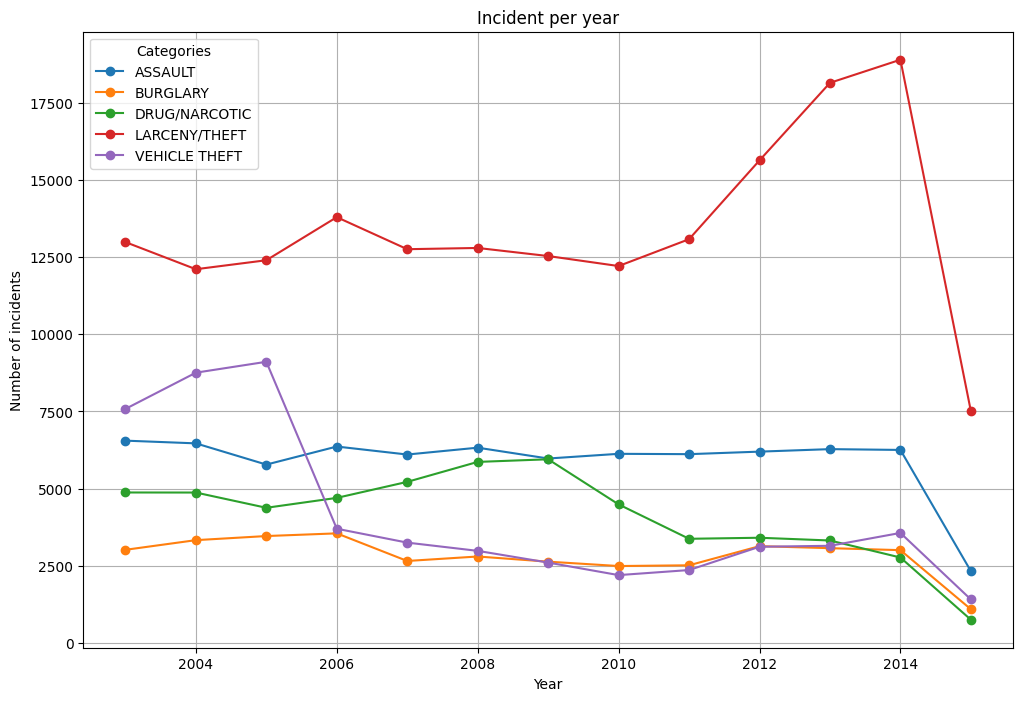

In [32]:
# we could now drop the "dates" column to ease out the data and reduce the complexity for the model,
# but we decided not to do this because we can still use the original "dates" for further analysis, references and correlations or simple visualisation
# we could also rearrange the columns to have all the extracted information at the front but this is not really needed 
# let's now look at the development of these over time

# plot
grouped = filter_df.groupby(['year', 'Category']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
for category in grouped.columns:
    plt.plot(grouped.index, grouped[category], label=category, marker='o')
plt.title('Incident per year')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

# This chart already provides a very good overview, but we decided to dig a little deeper into the data and create a line chart for the quarters

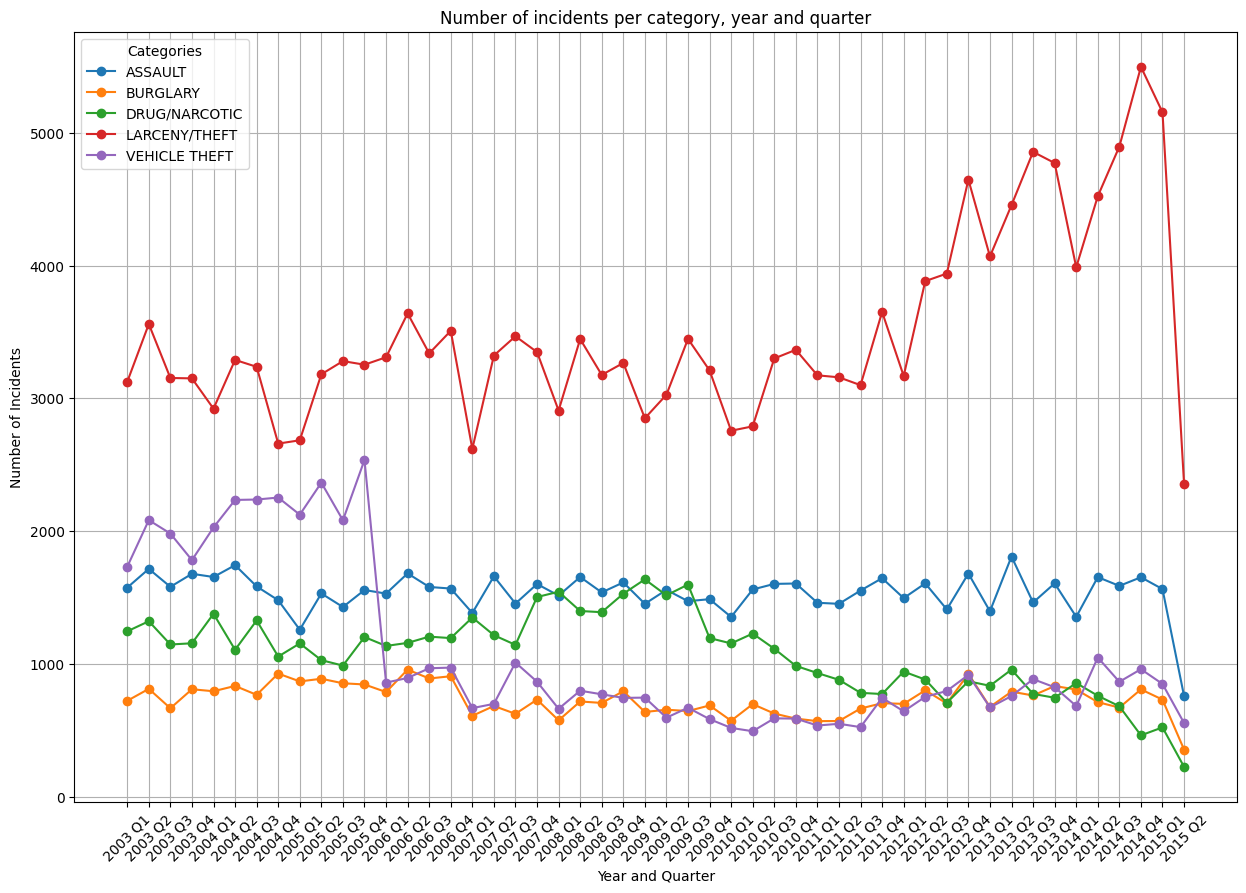

In [57]:
# group by year,quarter and category
grouped = filter_df.groupby(['year', 'quarter', 'Category']).size()
grouped_df = grouped.unstack('Category', fill_value=0)

# new combined index
grouped_df.index = ['{} Q{}'.format(year, quarter) for year, quarter in grouped_df.index]

# plot
plt.figure(figsize=(15, 10))
# line for each category
for category in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[category], label=category, marker='o')

plt.title('Number of incidents per category, year and quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.grid(True)
plt.show()

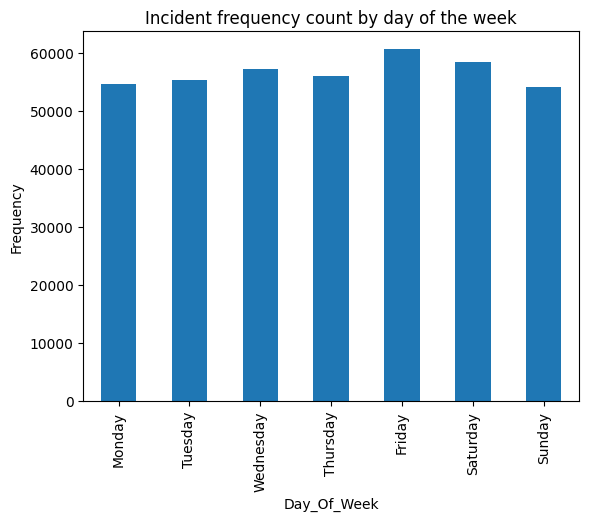

In [14]:
# We could transform dayofweek to numeric to reduce objects.
# To decide between numbers 1-7 and one-hot we have to look into the distribution.
# If we use numbers 1-7 the model could think that this implies some kind of order.
# Since we dont want that to happen we have to explore the data as mentioned.


# plot
# create order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Incident frequency count by day of the week
icident_frequency = filter_df['DayOfWeek'].value_counts()

# Umordnen der Vorfälle gemäß der Wochentag-Reihenfolge
icident_frequency = icident_frequency.reindex(days_order)

icident_frequency.plot(kind='bar')
plt.title('Incident frequency count by day of the week')
plt.xlabel('Day_Of_Week')
plt.ylabel('Frequency')
plt.show()

# The diagram shows a relatively even distribution of incidents.
# Only on Friday was there a slightly larger increase in incidents.
# Now that could mean that there is no real connection between the days and the incidents.
# Since the number of incidents per day is relatively similar and there is no clear trend or order,
# we think that one-hot encoding is a better choice. It allows the model to learn independent patterns for each day without assuming a specific order.
# This would of course increase the complexity of the model.